Text(0.5, 1.0, 'Label')

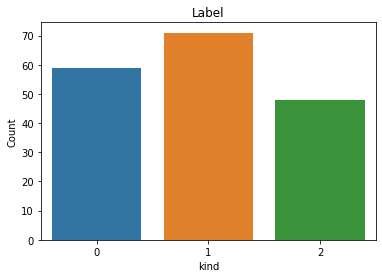

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

wine_data = load_wine()
df_data=pd.DataFrame(wine_data.data, columns= wine_data.feature_names)
df_target=pd.DataFrame(wine_data.target, columns=["kind"])
totall_data= pd.concat([df_data,df_target], axis=1)
sns.countplot(data=totall_data, x="kind")
plt.xlabel("kind")
plt.ylabel("Count")
plt.title("Label")


In [3]:
totall_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'kind'],
      dtype='object')

In [4]:
df_data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

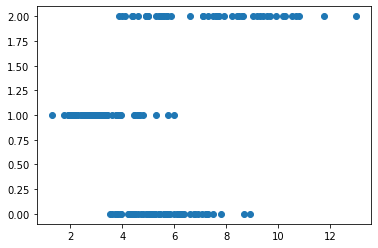

In [5]:
plt.scatter(totall_data["color_intensity"],totall_data["kind"])

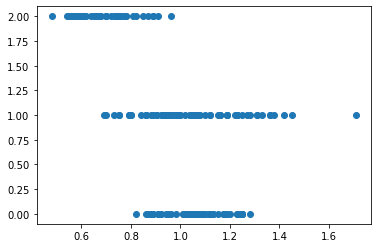

In [6]:
plt.scatter(totall_data["hue"],totall_data["kind"])

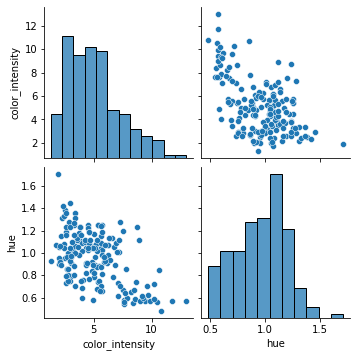

In [7]:
sns.pairplot(totall_data, vars=["color_intensity","hue"])
plt.show()

<AxesSubplot:xlabel='color_intensity', ylabel='kind'>

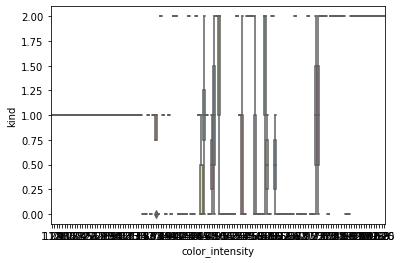

In [8]:
sns.boxplot(x="color_intensity", y="kind",data=totall_data, palette="Set3")

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X=totall_data.drop('kind',axis=1)
X.head()
y=df_target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
amodel = KNeighborsClassifier(n_neighbors=3)
amodel.fit(X_train, y_train)
prediction = amodel.predict(X_test)
accuracy = amodel.score(X_test, y_test)
print(accuracy)

0.7333333333333333


C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [10]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.8222222222222222
[[15  0  1]
 [ 0 17  4]
 [ 0  3  5]]


C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [11]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9333333333333333
[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))

C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Neural Network Classifier ---
0.9555555555555556
[[15  1  0]
 [ 0 20  1]
 [ 0  0  8]]


In [13]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9333333333333333
[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9777777777777777
[[16  0  0]
 [ 0 20  1]
 [ 0  0  8]]


In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
df_data=X.to_numpy()

In [17]:
df_target=y.to_numpy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,test_size=0.25,random_state=0)

In [19]:
sc= SGDClassifier(loss='log', random_state=42)

In [20]:
train_score=[]
test_score=[]

In [21]:
classes =np.unique(y_train)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss= StandardScaler()
ss.fit(X_train)

StandardScaler()

In [25]:
train_scaled= ss.transform(X_train)
test_scaled= ss.transform(X_test)

In [26]:
for _ in range(0,300):
    sc.partial_fit(X_train, y_train, classes= classes)
    train_score.append(sc.score(X_train, y_train))
    test_score.append(sc.score(X_test, y_test))

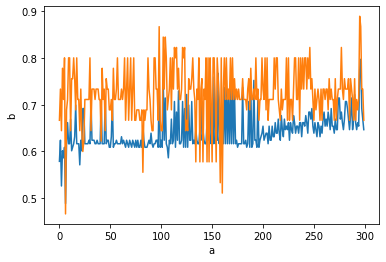

In [27]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

In [29]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, y_train, classes=classes)
    train_score.append(sc.score(train_scaled, y_train))
    test_score.append(sc.score(test_scaled, y_test))

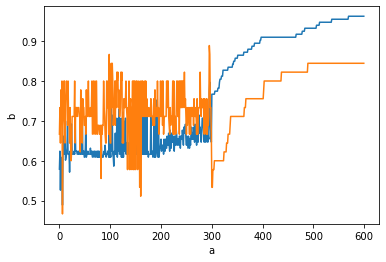

In [30]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

In [33]:
sc= SGDClassifier(loss='log', max_iter=100, random_state=42)
sc.fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

1.0
1.0


In [34]:
sc.partial_fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

1.0
1.0


In [35]:
from sklearn.model_selection import cross_validate

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt= DecisionTreeClassifier(random_state=42)

In [39]:
scores= cross_validate(dt, X_train, y_train)

In [40]:
print(scores)

{'fit_time': array([0.00299263, 0.00100112, 0.00199437, 0.00199342, 0.00099826]), 'score_time': array([0.        , 0.00099397, 0.00099874, 0.0009973 , 0.00099802]), 'test_score': array([0.77777778, 0.96296296, 0.92592593, 0.92307692, 0.80769231])}


In [41]:
from sklearn.model_selection import StratifiedKFold

In [42]:
scores= cross_validate(dt, X_train, y_train, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.8794871794871794


In [43]:
splitter = StratifiedKFold(n_splits=10, shuffle= True, random_state=42)
scores= cross_validate(dt, X_train, y_train, cv= splitter)
print(np.mean(scores['test_score']))

0.9318681318681319


In [44]:
sub_input, val_input, sub_target, val_target = train_test_split(X_train, y_train, test_size=0.2, random_state= 42)

In [45]:
print(sub_input.shape, val_input.shape)

(106, 13) (27, 13)


In [46]:
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

1.0
0.8888888888888888
